In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("cleaned_data_5_.csv")

In [3]:
print(data.shape)
data.head(6)

(1227086, 22)


,AMT_CREDIT_x,AMT_GOODS_PRICE_x,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,...,HOUR_APPR_PROCESS_START_x,ORGANIZATION_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_CONTRACT_STATUS,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE_x,TARGET
0,406597.5,351000.0,0,1.0,24700.5,-9461,-637,0.018801,2,202500.0,...,10,Business Entity Type 3,Working,Laborers,Approved,M,Secondary / secondary special,Single / not married,Cash loans,1
1,1293502.5,1129500.0,0,2.0,35698.5,-16765,-1188,0.003541,1,270000.0,...,11,School,State servant,Core staff,Approved,F,Higher education,Married,Cash loans,0
2,1293502.5,1129500.0,0,2.0,35698.5,-16765,-1188,0.003541,1,270000.0,...,11,School,State servant,Core staff,Approved,F,Higher education,Married,Cash loans,0
3,1293502.5,1129500.0,0,2.0,35698.5,-16765,-1188,0.003541,1,270000.0,...,11,School,State servant,Core staff,Approved,F,Higher education,Married,Cash loans,0
4,135000.0,135000.0,0,1.0,6750.0,-19046,-225,0.010032,2,67500.0,...,9,Government,Working,Laborers,Approved,M,Secondary / secondary special,Single / not married,Revolving loans,0
5,312682.5,297000.0,0,2.0,29686.5,-19005,-3039,0.008019,2,135000.0,...,17,Business Entity Type 3,Working,Laborers,Approved,F,Secondary / secondary special,Civil marriage,Cash loans,0


In [4]:
data.isnull().sum()

AMT_CREDIT_x                  0
AMT_GOODS_PRICE_x             0
CNT_CHILDREN                  0
CNT_FAM_MEMBERS               0
AMT_ANNUITY_x                 0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
REGION_POPULATION_RELATIVE    0
REGION_RATING_CLIENT          0
AMT_INCOME_TOTAL              0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
HOUR_APPR_PROCESS_START_x     0
ORGANIZATION_TYPE             0
NAME_INCOME_TYPE              0
OCCUPATION_TYPE               0
NAME_CONTRACT_STATUS          0
CODE_GENDER                   0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_CONTRACT_TYPE_x          0
TARGET                        0
dtype: int64

In [5]:
data = (
    data
    .assign(
        DAYS_BIRTH=lambda x: pd.Timestamp('2000-01-01') + pd.to_timedelta(pd.to_numeric(x['DAYS_BIRTH'], errors='coerce'), unit='D'),
        BIRTH_YEAR=lambda x: x['DAYS_BIRTH'].dt.year,
        DAYS_EMPLOYED=lambda x: pd.to_numeric(x['DAYS_EMPLOYED'], errors='coerce').clip(upper=365 * 100),
        EMPLOYMENT_START_DATE=lambda x: pd.Timestamp('2000-01-01') + pd.to_timedelta(x['DAYS_EMPLOYED'], unit='D', errors='coerce'),
        EMPLOYMENT_START_YEAR=lambda x: x['EMPLOYMENT_START_DATE'].dt.year
    )
)

print(data[['BIRTH_YEAR', 'EMPLOYMENT_START_DATE', 'EMPLOYMENT_START_YEAR']])

         BIRTH_YEAR EMPLOYMENT_START_DATE  EMPLOYMENT_START_YEAR
0              1974            1998-04-04                   1998
1              1954            1996-09-30                   1996
2              1954            1996-09-30                   1996
3              1954            1996-09-30                   1996
4              1947            1999-05-21                   1999
...             ...                   ...                    ...
1227081        1953            1996-07-18                   1996
1227082        1953            1996-07-18                   1996
1227083        1953            1996-07-18                   1996
1227084        1953            1996-07-18                   1996
1227085        1953            1996-07-18                   1996

[1227086 rows x 3 columns]


In [6]:
### desided to drop 230625 rows
mask = data['EMPLOYMENT_START_YEAR'] == 2099

true_rows = data[mask]

true_rows.head(5)

,AMT_CREDIT_x,AMT_GOODS_PRICE_x,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,...,OCCUPATION_TYPE,NAME_CONTRACT_STATUS,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE_x,TARGET,BIRTH_YEAR,EMPLOYMENT_START_DATE,EMPLOYMENT_START_YEAR
32,1019610.0,913500.0,0,2.0,33826.5,1944-12-21,36500,0.018634,2,112500.000,...,Laborers,Refused,F,Secondary / secondary special,Married,Cash loans,0,1944,2099-12-07,2099
33,1019610.0,913500.0,0,2.0,33826.5,1944-12-21,36500,0.018634,2,112500.000,...,Laborers,Approved,F,Secondary / secondary special,Married,Cash loans,0,1944,2099-12-07,2099
34,1019610.0,913500.0,0,2.0,33826.5,1944-12-21,36500,0.018634,2,112500.000,...,Laborers,Approved,F,Secondary / secondary special,Married,Cash loans,0,1944,2099-12-07,2099
35,1019610.0,913500.0,0,2.0,33826.5,1944-12-21,36500,0.018634,2,112500.000,...,Laborers,Approved,F,Secondary / secondary special,Married,Cash loans,0,1944,2099-12-07,2099
42,148365.0,135000.0,0,2.0,10678.5,1944-02-07,36500,0.015221,2,38419.155,...,Laborers,Approved,F,Secondary / secondary special,Married,Cash loans,0,1944,2099-12-07,2099


In [7]:
data.drop(data[mask].index, inplace=True)
data.tail()

,AMT_CREDIT_x,AMT_GOODS_PRICE_x,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,...,OCCUPATION_TYPE,NAME_CONTRACT_STATUS,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE_x,TARGET,BIRTH_YEAR,EMPLOYMENT_START_DATE,EMPLOYMENT_START_YEAR
1227081,675000.0,675000.0,0,2.0,49117.5,1953-11-07,-1262,0.04622,1,157500.0,...,Laborers,Approved,F,Higher education,Married,Cash loans,0,1953,1996-07-18,1996
1227082,675000.0,675000.0,0,2.0,49117.5,1953-11-07,-1262,0.04622,1,157500.0,...,Laborers,Refused,F,Higher education,Married,Cash loans,0,1953,1996-07-18,1996
1227083,675000.0,675000.0,0,2.0,49117.5,1953-11-07,-1262,0.04622,1,157500.0,...,Laborers,Refused,F,Higher education,Married,Cash loans,0,1953,1996-07-18,1996
1227084,675000.0,675000.0,0,2.0,49117.5,1953-11-07,-1262,0.04622,1,157500.0,...,Laborers,Approved,F,Higher education,Married,Cash loans,0,1953,1996-07-18,1996
1227085,675000.0,675000.0,0,2.0,49117.5,1953-11-07,-1262,0.04622,1,157500.0,...,Laborers,Approved,F,Higher education,Married,Cash loans,0,1953,1996-07-18,1996


In [8]:
data['EMPLOYMENT_START_YEAR'].value_counts()

EMPLOYMENT_START_YEAR
1998    117141
1997    112270
1996     99461
1999     94323
1995     87743
1994     67527
1993     64251
1992     57298
1991     50236
1990     38799
1989     30941
1988     24524
1987     22096
1985     18873
1986     17775
1984     11095
1983      9381
1982      8209
1981      7679
1980      7552
1979      6242
1978      5820
1977      4996
1976      4024
1975      3593
1974      3185
1972      2681
1973      2665
1971      2344
1970      2098
1968      1893
1969      1656
1965      1467
1967      1281
1966      1250
1964       955
1963       686
1962       559
1960       511
1961       469
1959       237
1958       220
1957       136
1955       132
1956        90
1954        42
1953        21
1952        20
2000         9
1950         3
1951         2
Name: count, dtype: int64

In [9]:
data.tail(5)

,AMT_CREDIT_x,AMT_GOODS_PRICE_x,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,...,OCCUPATION_TYPE,NAME_CONTRACT_STATUS,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE_x,TARGET,BIRTH_YEAR,EMPLOYMENT_START_DATE,EMPLOYMENT_START_YEAR
1227081,675000.0,675000.0,0,2.0,49117.5,1953-11-07,-1262,0.04622,1,157500.0,...,Laborers,Approved,F,Higher education,Married,Cash loans,0,1953,1996-07-18,1996
1227082,675000.0,675000.0,0,2.0,49117.5,1953-11-07,-1262,0.04622,1,157500.0,...,Laborers,Refused,F,Higher education,Married,Cash loans,0,1953,1996-07-18,1996
1227083,675000.0,675000.0,0,2.0,49117.5,1953-11-07,-1262,0.04622,1,157500.0,...,Laborers,Refused,F,Higher education,Married,Cash loans,0,1953,1996-07-18,1996
1227084,675000.0,675000.0,0,2.0,49117.5,1953-11-07,-1262,0.04622,1,157500.0,...,Laborers,Approved,F,Higher education,Married,Cash loans,0,1953,1996-07-18,1996
1227085,675000.0,675000.0,0,2.0,49117.5,1953-11-07,-1262,0.04622,1,157500.0,...,Laborers,Approved,F,Higher education,Married,Cash loans,0,1953,1996-07-18,1996


## checking outlyers and skewness

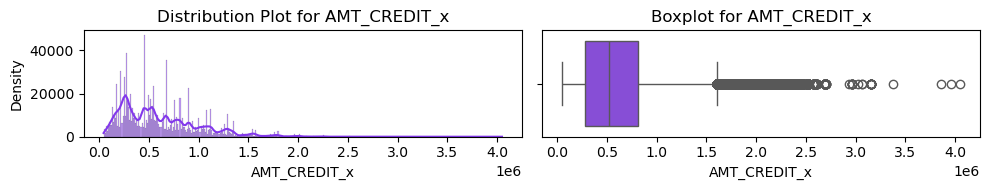

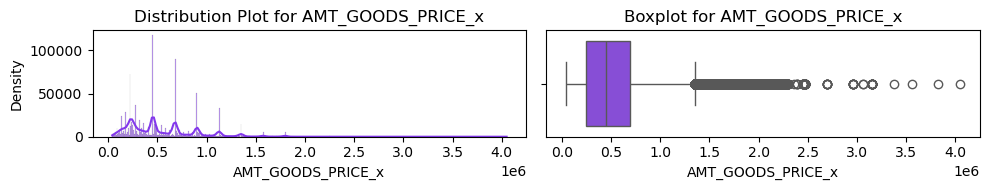

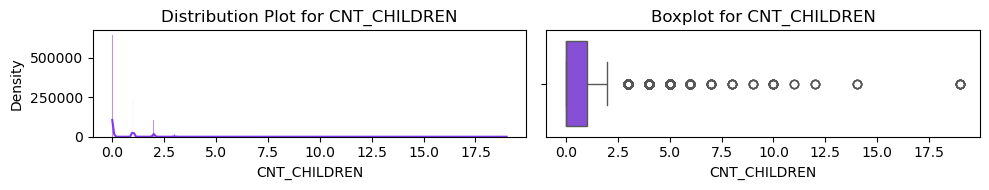

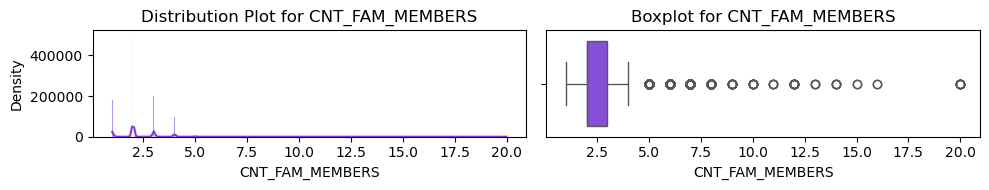

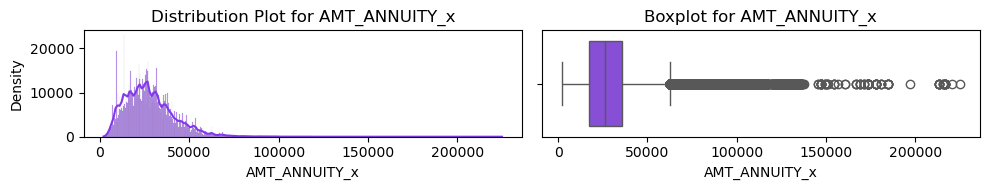

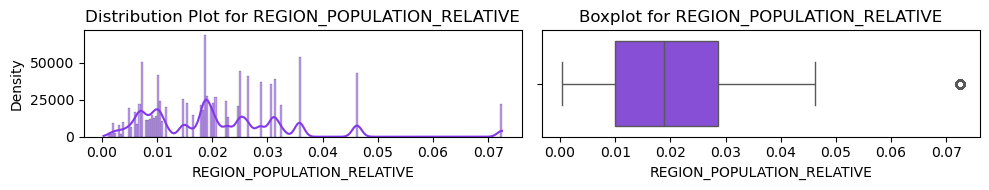

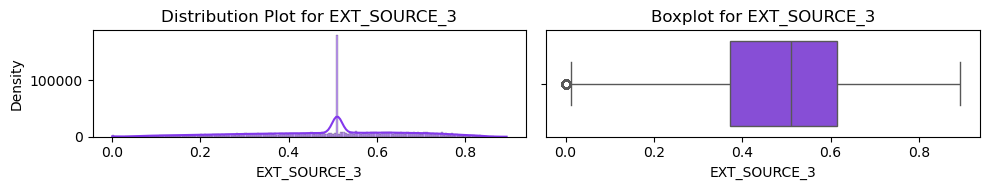

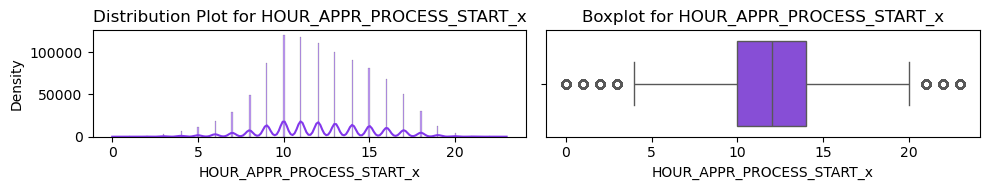

In [10]:
outlier_columns = ['AMT_CREDIT_x', 'AMT_GOODS_PRICE_x', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AMT_ANNUITY_x', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_3', 'HOUR_APPR_PROCESS_START_x']

def plot(df, column):
    fig, axes = plt.subplots(1, 2, figsize=(10, 2))

    # Plotting the distribution plot
    sns.histplot(df[column], ax=axes[0], kde=True, color='#8338ec')
    axes[0].set_title("Distribution Plot for " + column)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Density')

    # Plotting the boxplot
    sns.boxplot(x=df[column], ax=axes[1], color='#8338ec')
    axes[1].set_title("Boxplot for " + column)
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

for col in outlier_columns:
    plot(data, col)

In [11]:
before_stats = data[outlier_columns].describe().T
print("Summary statistics before removing outliers:")
before_stats

Summary statistics before removing outliers:


,count,mean,std,min,25%,50%,75%,max
AMT_CREDIT_x,996461.0,601814.161254,388111.903379,45000.000000,284256.000000,521280.00000,814041.000000,4.050000e+06
AMT_GOODS_PRICE_x,996461.0,540294.036924,355916.329308,40500.000000,247500.000000,450000.00000,688500.000000,4.050000e+06
CNT_CHILDREN,996461.0,0.499608,0.766955,0.000000,0.000000,0.00000,1.000000,1.900000e+01
CNT_FAM_MEMBERS,996461.0,2.268063,0.937044,1.000000,2.000000,2.00000,3.000000,2.000000e+01
AMT_ANNUITY_x,996461.0,27764.764997,14030.429971,1980.000000,17433.000000,25969.50000,35554.500000,2.250000e+05
REGION_POPULATION_RELATIVE,996461.0,0.020731,0.013270,0.000290,0.010032,0.01885,0.028663,7.250800e-02
EXT_SOURCE_3,996461.0,0.487995,0.179757,0.000527,0.372334,0.51009,0.614414,8.939761e-01
HOUR_APPR_PROCESS_START_x,996461.0,12.118335,3.270811,0.000000,10.000000,12.00000,14.000000,2.300000e+01


In [12]:
# removing outliers

for column in outlier_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

after_stats = data[outlier_columns].describe().T
print("Summary statistics after removing outliers:")
after_stats

Summary statistics after removing outliers:


,count,mean,std,min,25%,50%,75%,max
AMT_CREDIT_x,894012.0,547470.927582,321251.870776,45000.000000,270000.000000,495000.00000,760225.500000,1.607868e+06
AMT_GOODS_PRICE_x,894012.0,488449.221160,288363.789222,40500.000000,238500.000000,450000.00000,675000.000000,1.327500e+06
CNT_CHILDREN,894012.0,0.455440,0.681975,0.000000,0.000000,0.00000,1.000000,2.000000e+00
CNT_FAM_MEMBERS,894012.0,2.216964,0.863924,1.000000,2.000000,2.00000,3.000000,4.000000e+00
AMT_ANNUITY_x,894012.0,25726.953472,11426.748417,1980.000000,16875.000000,24813.00000,32895.000000,5.871600e+04
REGION_POPULATION_RELATIVE,894012.0,0.019497,0.010732,0.000290,0.010006,0.01885,0.026392,4.622000e-02
EXT_SOURCE_3,894012.0,0.487848,0.178285,0.013948,0.372334,0.51009,0.612704,8.939761e-01
HOUR_APPR_PROCESS_START_x,894012.0,12.089117,3.168354,4.000000,10.000000,12.00000,14.000000,2.000000e+01


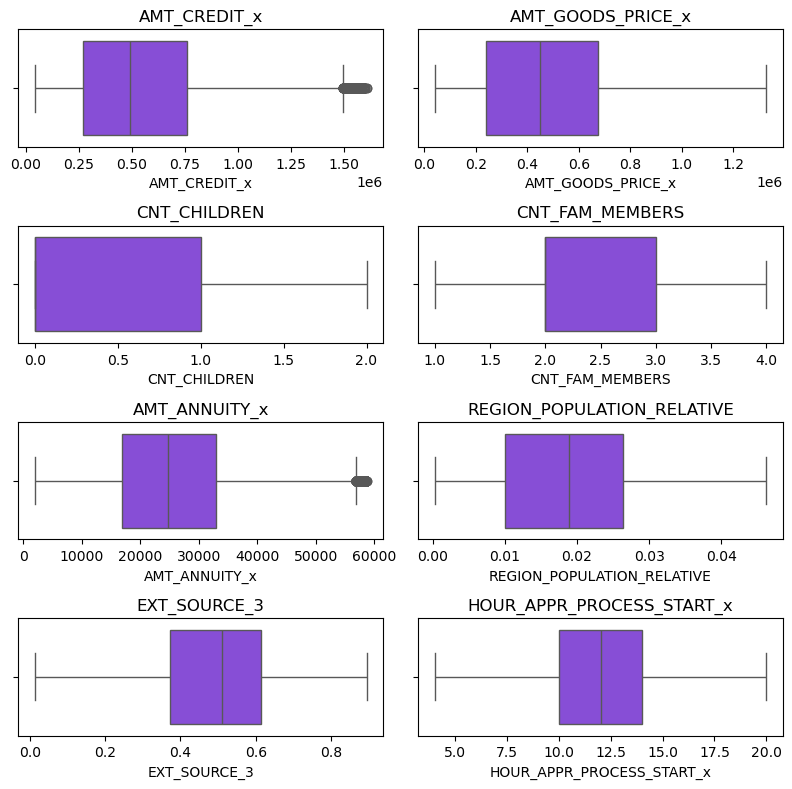

In [13]:
def outlier_plot(df, columns):
    n = len(columns)
    nrows = (n + 1) // 2  
    fig, axes = plt.subplots(nrows=nrows, ncols=2)
    fig.set_size_inches(8, 2 * nrows)

    for i, col in enumerate(columns):
        row = i // 2
        col_num = i % 2
        sns.boxplot(df[col], orient='h', ax=axes[row][col_num], color='#8338ec')
        axes[row][col_num].set_title(col)

    if n % 2 != 0:
        fig.delaxes(axes[-1][-1])

    plt.tight_layout()
    plt.show()

outlier_plot(data, outlier_columns)

In [14]:
data.head(5)

,AMT_CREDIT_x,AMT_GOODS_PRICE_x,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,...,OCCUPATION_TYPE,NAME_CONTRACT_STATUS,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE_x,TARGET,BIRTH_YEAR,EMPLOYMENT_START_DATE,EMPLOYMENT_START_YEAR
0,406597.5,351000.0,0,1.0,24700.5,1974-02-05,-637,0.018801,2,202500.0,...,Laborers,Approved,M,Secondary / secondary special,Single / not married,Cash loans,1,1974,1998-04-04,1998
1,1293502.5,1129500.0,0,2.0,35698.5,1954-02-06,-1188,0.003541,1,270000.0,...,Core staff,Approved,F,Higher education,Married,Cash loans,0,1954,1996-09-30,1996
2,1293502.5,1129500.0,0,2.0,35698.5,1954-02-06,-1188,0.003541,1,270000.0,...,Core staff,Approved,F,Higher education,Married,Cash loans,0,1954,1996-09-30,1996
3,1293502.5,1129500.0,0,2.0,35698.5,1954-02-06,-1188,0.003541,1,270000.0,...,Core staff,Approved,F,Higher education,Married,Cash loans,0,1954,1996-09-30,1996
4,135000.0,135000.0,0,1.0,6750.0,1947-11-09,-225,0.010032,2,67500.0,...,Laborers,Approved,M,Secondary / secondary special,Single / not married,Revolving loans,0,1947,1999-05-21,1999


In [15]:
data.drop(columns= ['DAYS_BIRTH','DAYS_EMPLOYED','EMPLOYMENT_START_DATE'], axis=1, inplace=True)

data.tail(1)

,AMT_CREDIT_x,AMT_GOODS_PRICE_x,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_ANNUITY_x,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,EXT_SOURCE_2,EXT_SOURCE_3,...,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_CONTRACT_STATUS,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE_x,TARGET,BIRTH_YEAR,EMPLOYMENT_START_YEAR
1227085,675000.0,675000.0,0,2.0,49117.5,0.04622,1,157500.0,0.708569,0.113922,...,Commercial associate,Laborers,Approved,F,Higher education,Married,Cash loans,0,1953,1996


## skewness check

In [16]:
numeric_data = data.select_dtypes(include='number')
skewness = numeric_data.skew()
skewness

AMT_CREDIT_x                    0.660423
AMT_GOODS_PRICE_x               0.700011
CNT_CHILDREN                    1.187766
CNT_FAM_MEMBERS                 0.493439
AMT_ANNUITY_x                   0.473397
REGION_POPULATION_RELATIVE      0.506373
REGION_RATING_CLIENT            0.251206
AMT_INCOME_TOTAL              431.028504
EXT_SOURCE_2                   -0.784828
EXT_SOURCE_3                   -0.350618
HOUR_APPR_PROCESS_START_x       0.021431
TARGET                          2.795097
BIRTH_YEAR                     -0.221001
EMPLOYMENT_START_YEAR          -1.951416
dtype: float64

In [17]:
data['AMT_INCOME_TOTAL'] = np.log1p(data['AMT_INCOME_TOTAL'])
data['AMT_CREDIT_x'] = np.sqrt(data['AMT_CREDIT_x'])

In [18]:
after_reduced_skewness = data.select_dtypes(include='number')
skewness = after_reduced_skewness.skew()
skewness

AMT_CREDIT_x                  0.147229
AMT_GOODS_PRICE_x             0.700011
CNT_CHILDREN                  1.187766
CNT_FAM_MEMBERS               0.493439
AMT_ANNUITY_x                 0.473397
REGION_POPULATION_RELATIVE    0.506373
REGION_RATING_CLIENT          0.251206
AMT_INCOME_TOTAL              0.142328
EXT_SOURCE_2                 -0.784828
EXT_SOURCE_3                 -0.350618
HOUR_APPR_PROCESS_START_x     0.021431
TARGET                        2.795097
BIRTH_YEAR                   -0.221001
EMPLOYMENT_START_YEAR        -1.951416
dtype: float64

In [19]:
data.drop(columns=['AMT_GOODS_PRICE_x','CNT_FAM_MEMBERS'], axis=1, inplace=True)

In [20]:
model_test_sample = data.copy()

In [21]:
model_test_sample = model_test_sample[['BIRTH_YEAR','AMT_CREDIT_x','AMT_ANNUITY_x','AMT_INCOME_TOTAL','ORGANIZATION_TYPE','OCCUPATION_TYPE','EXT_SOURCE_2','EXT_SOURCE_3','REGION_POPULATION_RELATIVE','HOUR_APPR_PROCESS_START_x','EMPLOYMENT_START_YEAR','TARGET']]

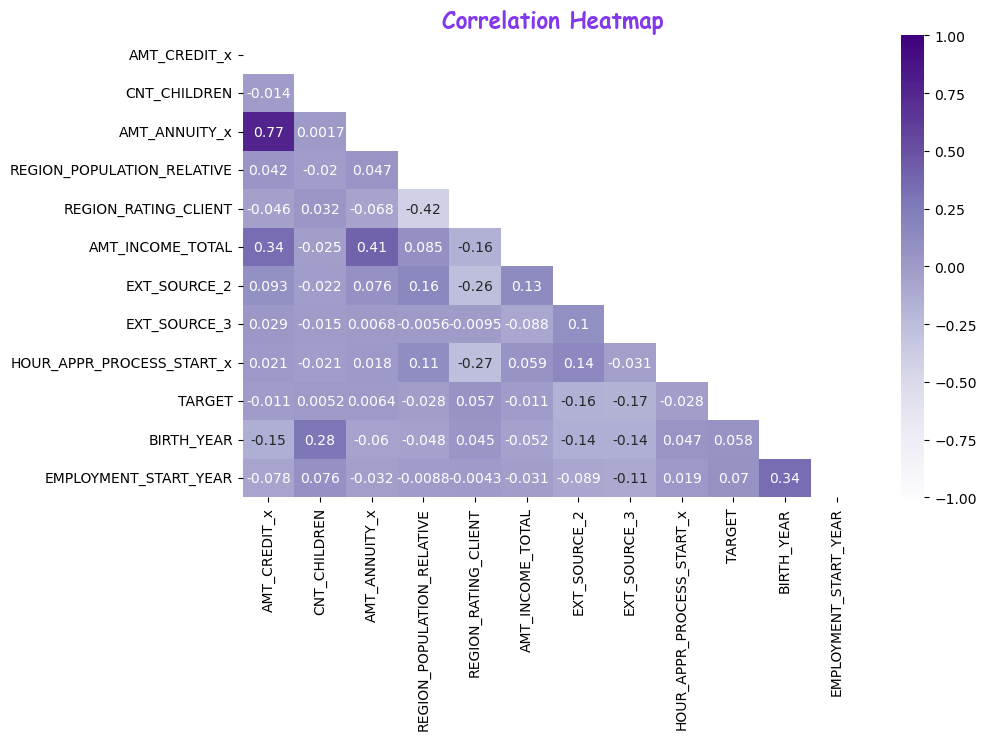

In [22]:
numeric_data = data.select_dtypes(include='number')
corr_matrix = numeric_data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap="Purples", annot=True, mask=mask, ax=ax, vmax=1, vmin=-1)

# Set title and axis properties
ax.set_title("Correlation Heatmap", fontsize=16, fontweight='bold', fontname='Comic Sans MS', color='#8338ec')
ax.tick_params(axis='both', colors='black')

plt.show()

## Converting categorical feature to numerical freature

In [23]:
obj_data = data.select_dtypes(include='object')

In [24]:
obj_data.head(5)

,ORGANIZATION_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_CONTRACT_STATUS,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE_x
0,Business Entity Type 3,Working,Laborers,Approved,M,Secondary / secondary special,Single / not married,Cash loans
1,School,State servant,Core staff,Approved,F,Higher education,Married,Cash loans
2,School,State servant,Core staff,Approved,F,Higher education,Married,Cash loans
3,School,State servant,Core staff,Approved,F,Higher education,Married,Cash loans
4,Government,Working,Laborers,Approved,M,Secondary / secondary special,Single / not married,Revolving loans


In [25]:
from sklearn.preprocessing import LabelEncoder
import pickle


categorical_columns = ['ORGANIZATION_TYPE','NAME_INCOME_TYPE','OCCUPATION_TYPE', 'NAME_CONTRACT_STATUS','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_CONTRACT_TYPE_x']  # Replace with your columns


encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)

In [26]:
import pickle

with open('label_encoders.pkl', 'rb') as file:
    encoders = pickle.load(file)

print('encoded as:')
for col, encoder in encoders.items():
    print(f"\nColumn: {col}")
    for category, code in zip(encoder.classes_, encoder.transform(encoder.classes_)):
        print(f"{category} is encoded as {code}")
    print("==" * 20)

encoded as:

Column: ORGANIZATION_TYPE
Advertising is encoded as 0
Agriculture is encoded as 1
Bank is encoded as 2
Business Entity Type 1 is encoded as 3
Business Entity Type 2 is encoded as 4
Business Entity Type 3 is encoded as 5
Cleaning is encoded as 6
Construction is encoded as 7
Culture is encoded as 8
Electricity is encoded as 9
Emergency is encoded as 10
Government is encoded as 11
Hotel is encoded as 12
Housing is encoded as 13
Industry: type 1 is encoded as 14
Industry: type 10 is encoded as 15
Industry: type 11 is encoded as 16
Industry: type 12 is encoded as 17
Industry: type 13 is encoded as 18
Industry: type 2 is encoded as 19
Industry: type 3 is encoded as 20
Industry: type 4 is encoded as 21
Industry: type 5 is encoded as 22
Industry: type 6 is encoded as 23
Industry: type 7 is encoded as 24
Industry: type 8 is encoded as 25
Industry: type 9 is encoded as 26
Insurance is encoded as 27
Kindergarten is encoded as 28
Legal Services is encoded as 29
Medicine is encoded as 

In [27]:
data.tail(5)

,AMT_CREDIT_x,CNT_CHILDREN,AMT_ANNUITY_x,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,EXT_SOURCE_2,EXT_SOURCE_3,HOUR_APPR_PROCESS_START_x,ORGANIZATION_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_CONTRACT_STATUS,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE_x,TARGET,BIRTH_YEAR,EMPLOYMENT_START_YEAR
1227081,821.583836,0,49117.5,0.04622,1,11.967187,0.708569,0.113922,20,5,0,8,0,0,1,1,0,0,1953,1996
1227082,821.583836,0,49117.5,0.04622,1,11.967187,0.708569,0.113922,20,5,0,8,2,0,1,1,0,0,1953,1996
1227083,821.583836,0,49117.5,0.04622,1,11.967187,0.708569,0.113922,20,5,0,8,2,0,1,1,0,0,1953,1996
1227084,821.583836,0,49117.5,0.04622,1,11.967187,0.708569,0.113922,20,5,0,8,0,0,1,1,0,0,1953,1996
1227085,821.583836,0,49117.5,0.04622,1,11.967187,0.708569,0.113922,20,5,0,8,0,0,1,1,0,0,1953,1996


# balancing the target variable

In [28]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X = data.drop('TARGET', axis=1)
Y = data['TARGET']


ros = RandomOverSampler(random_state=43)
X_balanced, Y_balanced = ros.fit_resample(X, Y)

# Verify balancing
print(Y_balanced.value_counts())

TARGET
1    810534
0    810534
Name: count, dtype: int64


In [29]:
balanced_data = pd.concat([pd.DataFrame(X_balanced), pd.Series(Y_balanced, name='TARGET')], axis=1)
sampled_data = balanced_data.sample(n=10000, random_state=42)

X_sampled = sampled_data.drop('TARGET', axis=1)
Y_sampled = sampled_data['TARGET']
sampled_data.head(5)

,AMT_CREDIT_x,CNT_CHILDREN,AMT_ANNUITY_x,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,EXT_SOURCE_2,EXT_SOURCE_3,HOUR_APPR_PROCESS_START_x,ORGANIZATION_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_CONTRACT_STATUS,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE_x,BIRTH_YEAR,EMPLOYMENT_START_YEAR,TARGET
1279487,670.820393,2,21109.5,0.028663,2,12.729324,0.285898,0.190706,9,3,5,14,0,0,4,3,0,1966,1997,1
715361,670.820393,0,24412.5,0.009630,2,12.218500,0.073086,0.104795,10,17,0,10,3,1,1,1,0,1952,1991,0
704769,1038.364098,1,31027.5,0.018634,2,12.343663,0.455955,0.519097,11,33,5,10,1,1,1,1,0,1952,1981,0
86613,875.375634,1,41697.0,0.005084,2,11.813037,0.497192,0.633032,10,5,0,8,0,0,4,1,0,1960,1992,0
35361,818.840644,0,21757.5,0.008474,2,12.419170,0.545904,0.510090,16,42,5,12,2,0,4,1,0,1954,1995,0


In [30]:
balanced_data['TARGET'].value_counts()

TARGET
1    810534
0    810534
Name: count, dtype: int64

In [31]:
# Split sampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, Y_sampled, test_size=0.1, random_state=42)

In [32]:
# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Top 20 important feature for target predicion

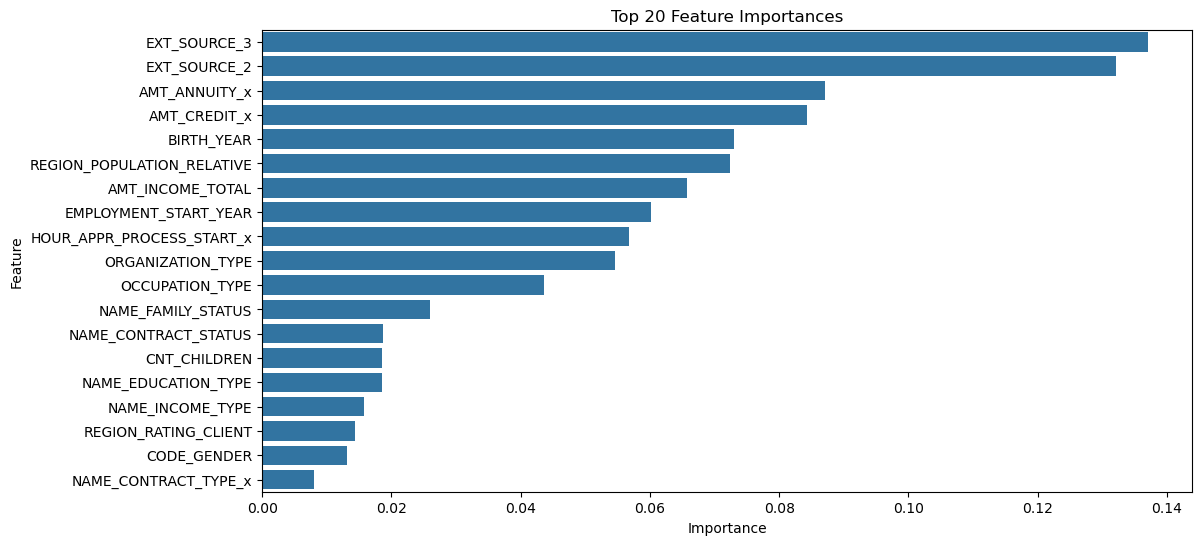

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_

feature_names = X.columns 

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

# Top 10 important feature for target predicion

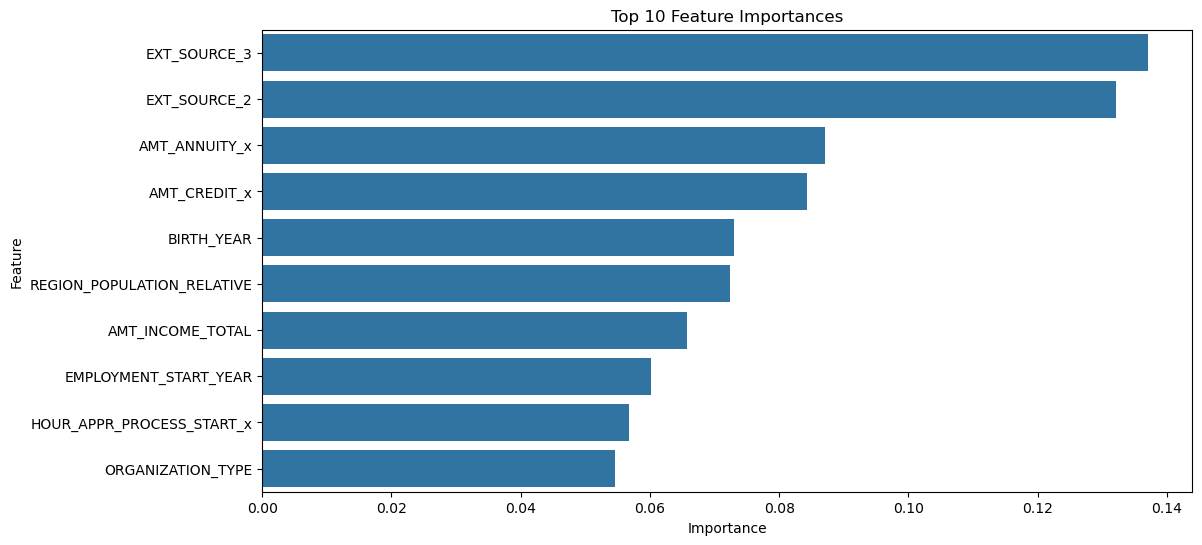

In [34]:
# Plot Top 10 Feature Importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

In [35]:
balanced_data['TARGET'].value_counts()

TARGET
1    810534
0    810534
Name: count, dtype: int64

In [36]:
balanced_data.columns

Index(['AMT_CREDIT_x', 'CNT_CHILDREN', 'AMT_ANNUITY_x',
       'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT',
       'AMT_INCOME_TOTAL', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'HOUR_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE',
       'OCCUPATION_TYPE', 'NAME_CONTRACT_STATUS', 'CODE_GENDER',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_CONTRACT_TYPE_x',
       'BIRTH_YEAR', 'EMPLOYMENT_START_YEAR', 'TARGET'],
      dtype='object')

In [37]:
Top_11_Features = ['BIRTH_YEAR','AMT_CREDIT_x','AMT_ANNUITY_x','AMT_INCOME_TOTAL','ORGANIZATION_TYPE','OCCUPATION_TYPE',
                   'EXT_SOURCE_2','EXT_SOURCE_3','REGION_POPULATION_RELATIVE',
                    'HOUR_APPR_PROCESS_START_x','EMPLOYMENT_START_YEAR','TARGET']
model= balanced_data[Top_11_Features]

In [38]:
# model.to_csv('model_data.csv', index=False)

In [39]:
model.tail(5)

,BIRTH_YEAR,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_INCOME_TOTAL,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START_x,EMPLOYMENT_START_YEAR,TARGET
1621063,1967,734.234295,29245.5,11.630717,5,8,0.153571,0.235311,0.031329,8,1996,1
1621064,1952,552.598860,13581.0,13.017005,5,10,0.721102,0.115387,0.035792,14,1999,1
1621065,1950,250.108976,7420.5,11.630717,55,4,0.622631,0.812823,0.035792,9,1998,1
1621066,1964,788.931556,31909.5,12.323860,30,8,0.562068,0.068711,0.022800,12,1983,1
1621067,1950,713.864483,22576.5,11.407576,20,4,0.271806,0.616122,0.035792,10,1999,1


In [40]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621068 entries, 0 to 1621067
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   BIRTH_YEAR                  1621068 non-null  int32  
 1   AMT_CREDIT_x                1621068 non-null  float64
 2   AMT_ANNUITY_x               1621068 non-null  float64
 3   AMT_INCOME_TOTAL            1621068 non-null  float64
 4   ORGANIZATION_TYPE           1621068 non-null  int32  
 5   OCCUPATION_TYPE             1621068 non-null  int32  
 6   EXT_SOURCE_2                1621068 non-null  float64
 7   EXT_SOURCE_3                1621068 non-null  float64
 8   REGION_POPULATION_RELATIVE  1621068 non-null  float64
 9   HOUR_APPR_PROCESS_START_x   1621068 non-null  int64  
 10  EMPLOYMENT_START_YEAR       1621068 non-null  int32  
 11  TARGET                      1621068 non-null  int64  
dtypes: float64(6), int32(4), int64(2)
memory usage: 123.7 MB

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb

In [42]:
X = model.drop(columns=["TARGET"]).values
y = model["TARGET"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Define models
models = {
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGBoostClassifier": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

for model_name, model1 in models.items():
    model1.fit(X_train, y_train)  # Train the model
    
    y_train_pred = model1.predict(X_train)  # Predictions on training data
    y_pred = model1.predict(X_test)  # Predictions on testing data
    
    # Compute metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    test_precision = precision_score(y_test, y_pred, average='weighted')
    
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    test_recall = recall_score(y_test, y_pred, average='weighted')
    
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    
    roc_auc = roc_auc_score(y_test, y_pred)
    
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    test_conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print model performance
    print("+---------------------------------------------------------------------------+")
    print(f"   -- {model_name} --              -- {model_name} --     ")
    print("+-----------------------------------+---------------------------------------+")
    print("| Model performance on training set   |  Model performance on testing set   | ")
    print("+---------------------------------------------------------------------------+")
    print(f"|       train_Accuracy : {train_accuracy:.4f}       |      test_Accuracy : {test_accuracy:.4f}         |")
    print(f"|       train_Precision : {train_precision:.4f}      |     test_Precision : {test_precision:.4f}         |")
    print(f"|        train_Recall : {train_recall:.4f}        |        test_Recall : {test_recall:.4f}         | ")
    print(f"|          train_F1 : {train_f1:.4f}          |           test_F1 : {test_f1:.4f}          |")
    print(f"|          Test_roc_auc :  {roc_auc}        |                                     |")
    print(f"          Confusion matrix :   {test_conf_matrix[0]}")
    print(f"                               {test_conf_matrix[1]}")
    print("+============================================================================+")

+---------------------------------------------------------------------------+
   -- ExtraTreesClassifier --              -- ExtraTreesClassifier --     
+-----------------------------------+---------------------------------------+
| Model performance on training set   |  Model performance on testing set   | 
+---------------------------------------------------------------------------+
|       train_Accuracy : 1.0000       |      test_Accuracy : 1.0000         |
|       train_Precision : 1.0000      |     test_Precision : 1.0000         |
|        train_Recall : 1.0000        |        test_Recall : 1.0000         | 
|          train_F1 : 1.0000          |           test_F1 : 1.0000          |
|          Test_roc_auc :  0.9999876309572402        |                                     |
          Confusion matrix :   [161690      4]
                               [     0 162520]
+============================================================================+
+--------------------------------

# Test Confusion Matrix:

# Saving the ExtraTreeClassification model to pkl file

In [45]:
ET_model = ExtraTreesClassifier()

ET_regression_model = ET_model.fit(X_train, y_train)

with open('ET_Classifier_model.pkl', 'wb') as file:
     pickle.dump(ET_regression_model, file)

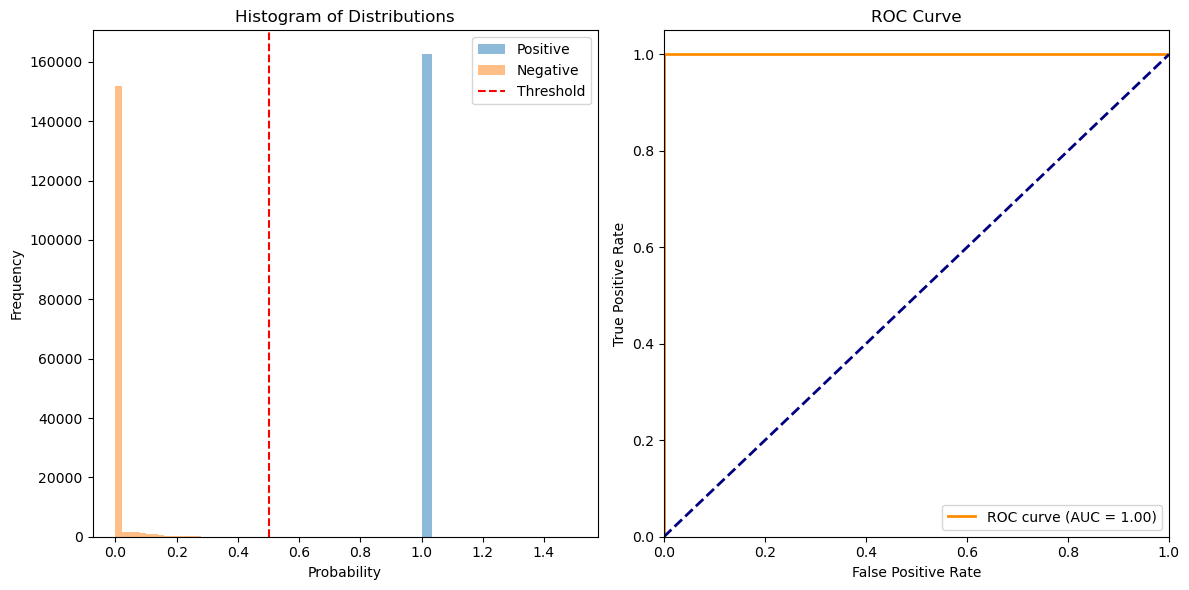

AUC: 1.0


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Load your model and data
with open('ET_Classifier_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Get predicted probabilities
y_pred_proba = loaded_model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)


positive_data = y_pred_proba[y_test == 1]
negative_data = y_pred_proba[y_test == 0]
threshold = 0.5

plt.figure(figsize=(12, 6))

# Plot histograms
plt.subplot(1, 2, 1)
plt.hist(positive_data, bins=30, alpha=0.5, label='Positive')
plt.hist(negative_data, bins=30, alpha=0.5, label='Negative')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.title('Histogram of Distributions')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Plot ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

print('AUC:', roc_auc)

In [47]:
with open('label_encoders.pkl', 'rb') as file:
    encoders = pickle.load(file)

def data_transformation_for_the_model(df):
    df = df.assign(
        ORGANIZATION_TYPE=lambda x: encoders['ORGANIZATION_TYPE'].transform(x['ORGANIZATION_TYPE']),
        OCCUPATION_TYPE=lambda x: encoders['OCCUPATION_TYPE'].transform(x['OCCUPATION_TYPE'])
    )
    return df

new_data = {
    'BIRTH_YEAR': [1974, 1952, 1952, 1954, 1954, 1954],
    'AMT_CREDIT_x': [637.649982, 1092.510870, 1092.510870, 1137.322514, 1137.322514, 1137.322514],
    'AMT_ANNUITY_x': [24700.5, 35028.0, 35028.0, 35698.5, 35698.5, 35698.5],
    'AMT_INCOME_TOTAL': [12.2185, 12.2185, 12.2185, 12.506181, 12.506181, 12.506181],
    'ORGANIZATION_TYPE': ["Business Entity Type 3", 'Business Entity Type 3', 'Business Entity Type 3', 'School', 'School', 'School'],
    'OCCUPATION_TYPE': ['Laborers', 'Laborers', 'Laborers', 'Core staff', 'Core staff', 'Core staff'],
    'EXT_SOURCE_2': [0.262949, 0.306841, 0.306841, 0.622246, 0.622246, 0.622246],
    'EXT_SOURCE_3': [0.139376, 0.320163, 0.320163, 0.51009, 0.51009, 0.51009],
    'REGION_POPULATION_RELATIVE': [0.018801, 0.025164, 0.025164, 0.003541, 0.003541, 0.003541],
    'HOUR_APPR_PROCESS_START_x': [10, 9, 9, 11, 11, 11],
    'EMPLOYMENT_START_YEAR': [1998, 1996, 1996, 1996, 1996, 1996]
}

# Create DataFrame
new_df = pd.DataFrame(new_data)

ready_to_predict = data_transformation_for_the_model(new_df)
ready_to_predict

,BIRTH_YEAR,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_INCOME_TOTAL,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START_x,EMPLOYMENT_START_YEAR
0,1974,637.649982,24700.5,12.218500,5,8,0.262949,0.139376,0.018801,10,1998
1,1952,1092.510870,35028.0,12.218500,5,8,0.306841,0.320163,0.025164,9,1996
2,1952,1092.510870,35028.0,12.218500,5,8,0.306841,0.320163,0.025164,9,1996
3,1954,1137.322514,35698.5,12.506181,39,3,0.622246,0.510090,0.003541,11,1996
4,1954,1137.322514,35698.5,12.506181,39,3,0.622246,0.510090,0.003541,11,1996
5,1954,1137.322514,35698.5,12.506181,39,3,0.622246,0.510090,0.003541,11,1996


In [48]:
with open('ET_Classifier_model.pkl', 'rb') as file:
    final_model = pickle.load(file)

values = ready_to_predict.values

predicted_price = final_model.predict(values) 
predicted_price

array([1, 1, 1, 0, 0, 0], dtype=int64)

# Tested with below data its given 100% Accurate classification

In [49]:
# Defaulter data
(model_test_sample[model_test_sample['TARGET'] == 1]).tail(3)

,BIRTH_YEAR,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_INCOME_TOTAL,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START_x,EMPLOYMENT_START_YEAR,TARGET
1226998,1954,721.99723,23089.5,12.323860,Business Entity Type 3,Sales staff,0.615261,0.397946,0.014464,5,1999,1
1227076,1967,608.36420,20205.0,12.049425,Business Entity Type 1,Laborers,0.514163,0.661024,0.005313,9,1986,1
1227077,1967,608.36420,20205.0,12.049425,Business Entity Type 1,Laborers,0.514163,0.661024,0.005313,9,1986,1


# Non-Defaulter Data

In [50]:
(model_test_sample[model_test_sample['TARGET'] == 0]).tail(3)

,BIRTH_YEAR,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_INCOME_TOTAL,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START_x,EMPLOYMENT_START_YEAR,TARGET
1227083,1953,821.583836,49117.5,11.967187,Business Entity Type 3,Laborers,0.708569,0.113922,0.04622,20,1996,0
1227084,1953,821.583836,49117.5,11.967187,Business Entity Type 3,Laborers,0.708569,0.113922,0.04622,20,1996,0
1227085,1953,821.583836,49117.5,11.967187,Business Entity Type 3,Laborers,0.708569,0.113922,0.04622,20,1996,0
